In [38]:
import pandas as pd
import plotly.express as px
from pycountry_convert import country_name_to_country_alpha3

In [39]:
data = pd.read_csv('extracted_locations.csv')
data

,Unnamed: 0,location,victim_index,latitude_x,longitude_x,country,country_code,departure,latitude_y,longitude_y,arrival_1,arrival_2,arrival_3
0,4,United States,42,37.990660,-81.426500,United States,USA,Philippines,34.052234,-118.243685,United States,NaN,NaN
1,5,United States,42,39.715956,-96.999668,United States,USA,Philippines,34.052234,-118.243685,United States,NaN,NaN
2,9,California,42,36.531544,-119.586168,United States,USA,Philippines,34.052234,-118.243685,United States,NaN,NaN
3,11,United States,59,37.990660,-81.426500,United States,USA,Indonesia,37.090240,-95.712891,United States,NaN,NaN
4,12,United States,59,39.715956,-96.999668,United States,USA,Indonesia,37.090240,-95.712891,United States,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2747,White,1134,40.650192,-79.168325,United States,USA,United States,37.090240,-95.712891,United States,NaN,NaN
940,2748,House,1134,32.628750,-88.994780,United States,USA,United States,37.090240,-95.712891,United States,NaN,NaN
941,2749,Nebraska,1163,41.499671,-99.810075,United States,USA,United States,41.492538,-99.901810,United States,NaN,NaN
942,2750,Nebraska,1172,41.499671,-99.810075,United States,USA,United States,41.492538,-99.901810,United States,NaN,NaN


In [40]:
def get_alpha3(col):
    try:
        iso_3 =  country_name_to_country_alpha3(col)
    except:
        iso_3 = 'Unknown'
    return iso_3

In [41]:
data['alpha_3'] = data['country'].apply(lambda x: get_alpha3(x))
data_map = pd.DataFrame(data.groupby(['country', 'alpha_3'])['alpha_3'].agg(Victims='count')).reset_index()

In [42]:
data_map

,country,alpha_3,Victims
0,Afghanistan,AFG,2
1,Albania,ALB,4
2,Australia,AUS,11
3,Bahrain,BHR,1
4,Bangladesh,BGD,3
...,...,...,...
64,United Kingdom,GBR,46
65,United States,USA,260
66,Venezuela,VEN,1
67,Vietnam,VNM,2


In [43]:
fig = px.choropleth(data_map, locations="alpha_3",
                    color="Victims",
                    hover_name="country",
                    color_continuous_scale='Viridis_r')
fig.update_layout(title_text="Human Trafficking Victims")
fig.show()

In [63]:
data['location'].value_counts()[:30].sort_values(ascending=False)

United States    73
China            61
Sudan            48
Saudi            31
Telangana        20
England          17
Italy            17
India            17
London           16
Yemen            16
New York         16
America          16
Malaysia         16
California       14
Libya            13
Thailand         13
Mumbai           12
Russia           12
Lebanon          11
France           11
Kuwait           10
Japan            10
Manila            9
Chicago           9
Uganda            9
Kolkata           9
Cebu              8
Cambodia          8
Delhi             8
Nigeria           7
Name: location, dtype: int64

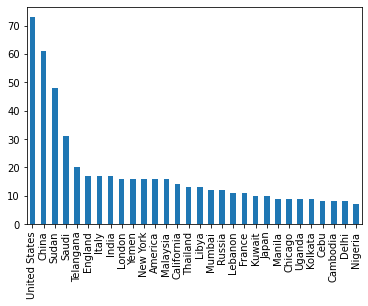

In [65]:
data['location'].value_counts()[:30].plot(kind='bar')